In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

0* Imaginability TangibilityCondition 
1 AmountDonated Sympathy 
2 Impact 

forbiddirect

TangibilityCondition ==> Impact 
requiredirect

Sympathy ==> TangibilityCondition 

#### Load causal algorithms from the py-causal library and Run GFCI

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'gfci', testId = 'cond-gauss-lrt', scoreId = 'cond-gauss-bic')

alpha: Cutoff for p values (alpha) (min = 0.0) (java.lang.Double) [default:0.01]
discretize: Yes if continuous variables should be discretized when child is discrete (java.lang.Boolean) [default:true]
structurePrior: Structure prior coefficient (min = 1.0) (java.lang.Double) [default:1.0]
discretize: Yes if continuous variables should be discretized when child is discrete (java.lang.Boolean) [default:true]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
maxPathLength: The maximum length for any discriminating path. -1 if unlimited (min = -1) (java.lang.Integer) [default:-1]
completeRuleSetUsed: Yes if the complete FCI rule set should be used (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (jav

In [6]:
tetrad.run(algoId = 'gfci', dfs = df, testId = 'cond-gauss-lrt', scoreId = 'cond-gauss-bic', 
           priorKnowledge = prior, dataType = 'mixed', numCategoriesToDiscretize = 4,
           penaltyDiscount = 2, structurePrior = 1.0, maxDegree = 3, maxPathLength = -1, alpha = 0.05, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
           bootstrapSampleSize = 5, bootstrapEnsemble = 0)

#### GFCI Mixed' Result's Nodes

In [7]:
tetrad.getNodes()

['AmountDonated',
 'Imaginability',
 'Impact',
 'Sympathy',
 'TangibilityCondition']

#### GFCI Mixed' Result's Edges

In [8]:
tetrad.getEdges()

['TangibilityCondition --> AmountDonated [no edge]:0.8000[-->]:0.0000[<--]:0.2000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.0000',
 'Sympathy o-> Impact [no edge]:0.0000[-->]:0.0000[<--]:0.0000[o->]:0.0000[<-o]:1.0000[o-o]:0.0000[<->]:0.0000[---]:0.0000',
 'Sympathy --> TangibilityCondition [no edge]:0.0000[-->]:1.0000[<--]:0.0000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.0000',
 'AmountDonated o-> Impact [no edge]:0.2000[-->]:0.0000[<--]:0.0000[o->]:0.8000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.0000',
 'Imaginability o-> Impact [no edge]:0.2000[-->]:0.0000[<--]:0.0000[o->]:0.8000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:0.0000']

#### Plot The Result's Graph

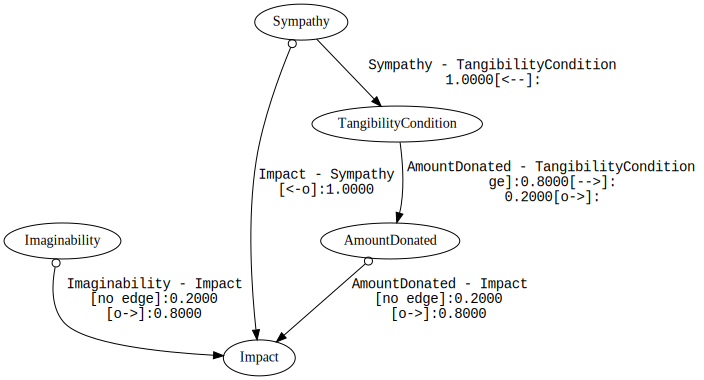

In [9]:
dot = tetrad.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

#### Stop Java VM

In [10]:
pc.stop_vm()